In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [ ]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_data.Churn.value_counts()

No     3738
Yes    1332
Name: Churn, dtype: int64

In [ ]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#checking why the TotalCharges are showing as object types
telco_data.TotalCharges.value_counts()

          8
19.75     7
20.2      7
20.15     6
19.45     6
         ..
7511.3    1
4055.5    1
5552.5    1
1070.7    1
334.8     1
Name: TotalCharges, Length: 4774, dtype: int64

In [ ]:
# Find missing values
print('Missing values:\n{}'.format(telco_data.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(telco_data.duplicated().sum()))

# Find the unique values of 'TotalCharges'.
print('\nUnique values of "TotalCharges": {}'.format(telco_data['TotalCharges'].unique()))

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Number of duplicated records: 0

Unique values of "TotalCharges": ['29.85' '1889.5' '108.15' ... '2390.45' '1923.5' '338.1']


In [ ]:
# Converting Total Charges to a numerical data type.
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [ ]:
telco_data.shape

(5070, 21)

In [ ]:
#as there are only 8 record that are not null in our dataframe out of 5070 records, we can drop the same
#Removing missing values 
telco_data.dropna(inplace = True)


In [ ]:
telco_data.shape

(5062, 21)

In [ ]:
telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#removing customer ID as ID's don't contribute much to analysis

telco_data = telco_data.iloc[:,1:]

In [ ]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


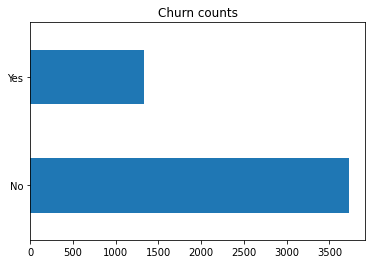

In [ ]:
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [ ]:
telco_data.Churn = telco_data.Churn.replace({'Yes':1, 'No':0}) # Replacing 'Yes' and 'No' with numerical values

In [ ]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


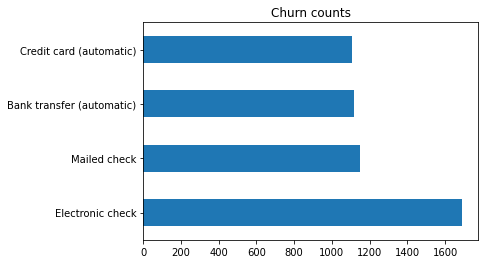

In [ ]:
telco_data.PaymentMethod.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

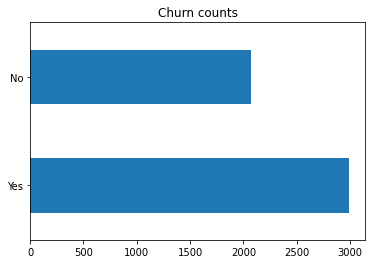

In [ ]:
telco_data.PaperlessBilling.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

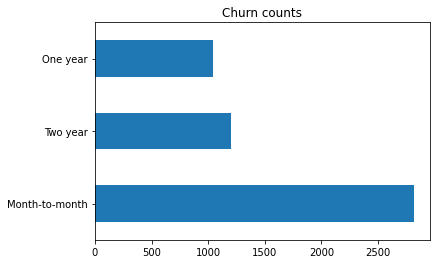

In [ ]:
telco_data.Contract.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

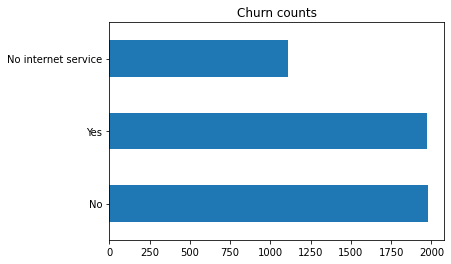

In [ ]:
telco_data.StreamingMovies.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

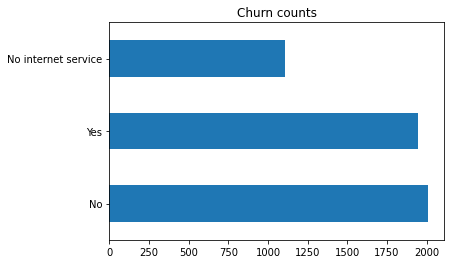

In [ ]:
telco_data.StreamingTV.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

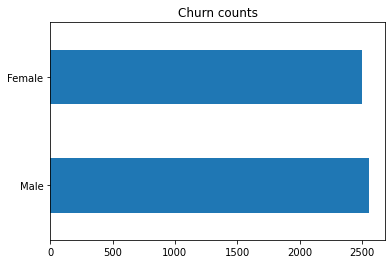

In [ ]:
telco_data.gender.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

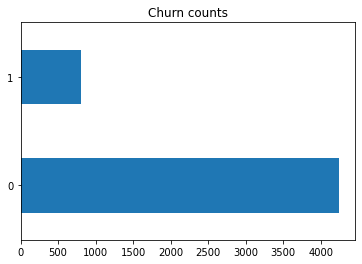

In [ ]:
telco_data.SeniorCitizen.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

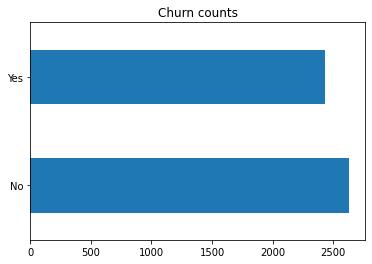

In [ ]:
telco_data.Partner.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

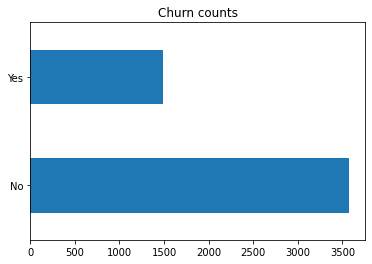

In [ ]:
telco_data.Dependents.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

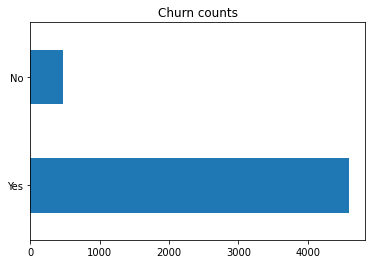

In [ ]:
telco_data.PhoneService.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

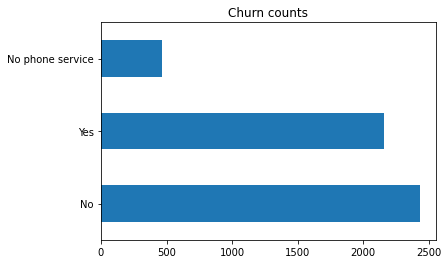

In [ ]:
telco_data.MultipleLines.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 


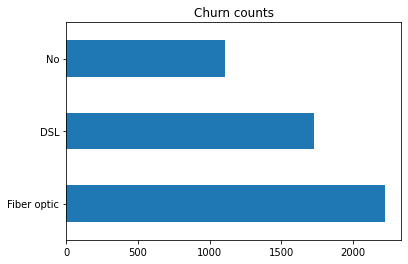

In [ ]:
telco_data.InternetService.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 


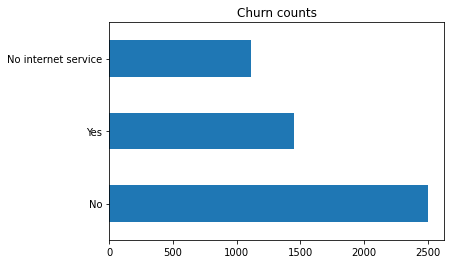

In [ ]:
telco_data.OnlineSecurity.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

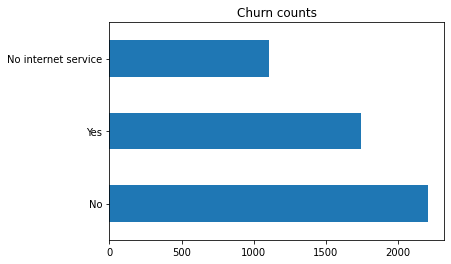

In [ ]:
telco_data.OnlineBackup.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

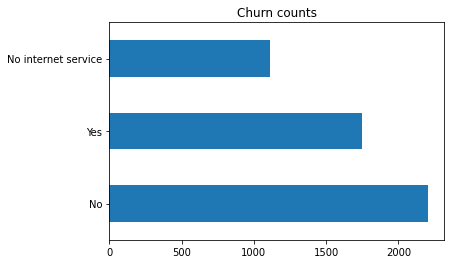

In [ ]:
telco_data.DeviceProtection.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

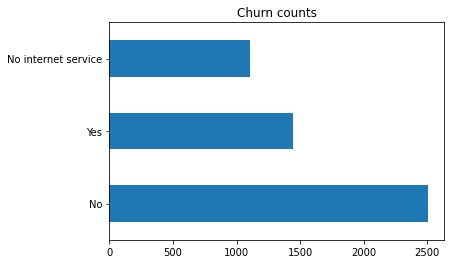

In [ ]:
telco_data.TechSupport.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [ ]:
#as data has lot of categorical variables, Let's convert all the categorical variables into dummy variables
#telco_data_final = pd.get_dummies(telco_data)
#telco_data_final.head()



#Churn	                                Was the customer churned?	                                  0 = No, 1 = Yes
#Month-to-Month_contract	              Was it a monthly contract?	                                0 = No, 1 = Yes
#Ony-year_contract	                    Was it a one-year contract?	                                0 = No, 1 = Yes
#SeniorCitizen	                        Was the customer is a senior citizen?	                      0 = No, 1 = Yes
#PhoneService	                        Did the customer have a phone service?	                      0 = No, 1 = Yes
#DSL	                                  Did the customer have a DSL internet connection?	          0 = No, 1 = Yes
#Fiber_optic	                          Did the customer have a Fiber optic internet connection?    0 = No, 1 = Yes

In [ ]:
#Encoding conventional way as majority of catgorical variables has only 2 types of values

#telco_data.gender = telco_data.gender.replace({'Male':1, 'Female':0}) # Replacing 'Yes' and 'No' with numerical value

#telco_data.head()

In [ ]:
categorical_cols = telco_data.columns[telco_data.dtypes=='object'].tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
# Create dummy variables
telco_data_final = pd.get_dummies(data = telco_data, columns=categorical_cols, drop_first=False)
telco_data_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,1,33,24.90,847.80,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
5066,0,44,54.30,2390.45,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0
5067,0,30,66.30,1923.50,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0
5068,0,71,20.90,1493.20,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0


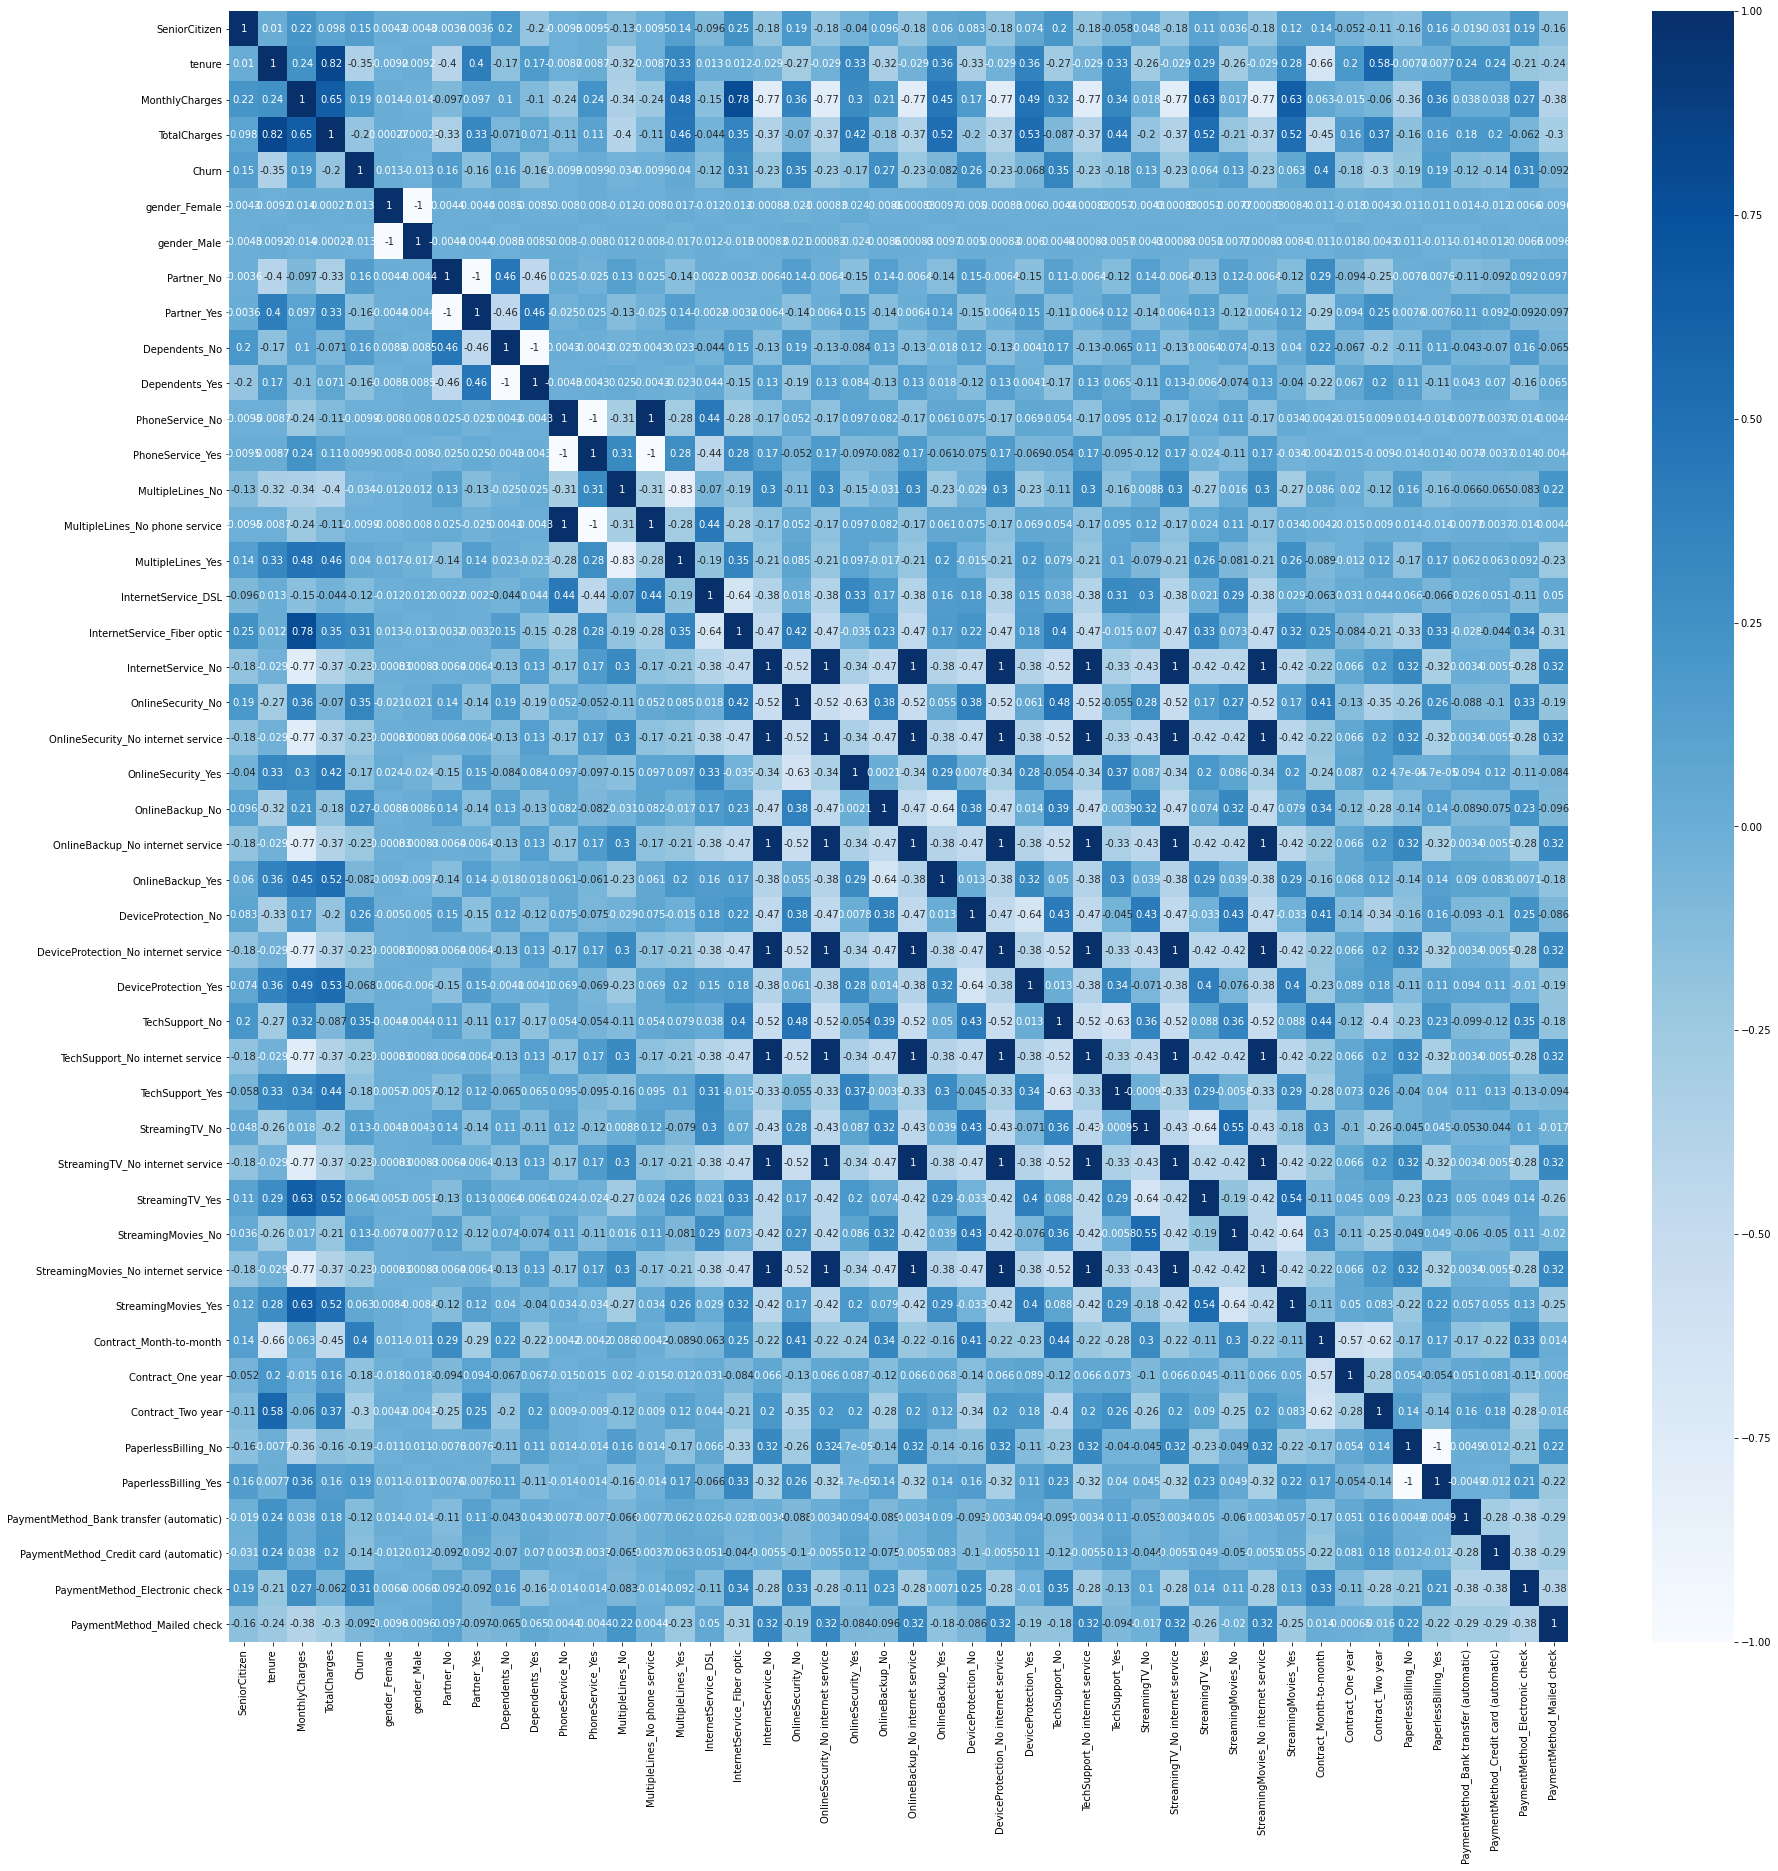

In [ ]:
#CHECKING CORRLEATION

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(telco_data_final.corr(), cmap="Blues", annot=True)
plt.show()
#sns.heatmap(telco_data_final.corr(), annot = True, fmt='.1g')


In [ ]:
#checking correlation
corr = telco_data_final.corr()
print (corr['Churn'].sort_values(ascending=False)[:5], '\n')
print (corr['Churn'].sort_values(ascending=False)[-5:])

Churn                             1.000000
Contract_Month-to-month           0.404556
TechSupport_No                    0.350657
OnlineSecurity_No                 0.345563
PaymentMethod_Electronic check    0.311071
Name: Churn, dtype: float64 

StreamingMovies_No internet service   -0.231707
OnlineSecurity_No internet service    -0.231707
StreamingTV_No internet service       -0.231707
Contract_Two year                     -0.302895
tenure                                -0.353808
Name: Churn, dtype: float64


In [ ]:
#Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, 
#two year contracts seem to be negatively correlated with churn.



In [ ]:
y = telco_data_final['Churn'].values

In [ ]:
# We will use the data frame where we had created dummy variables

X = telco_data_final.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
X = telco_data_final.drop(columns = ['Churn'])

X = X.fillna(method='ffill')

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2')
result = model.fit(X_train, y_train)

predictions = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# fit a model
#clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
#predictions = clf.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8209348255431205


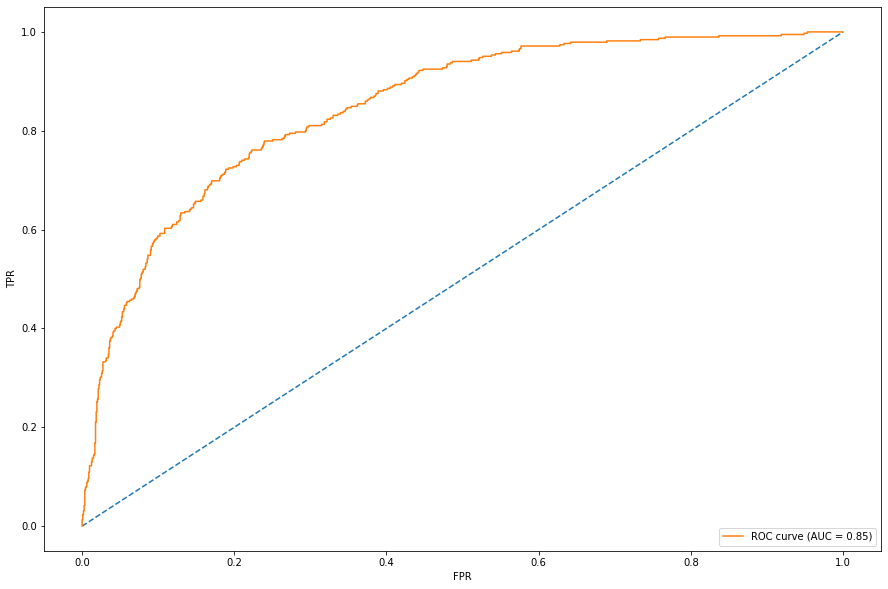

In [ ]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


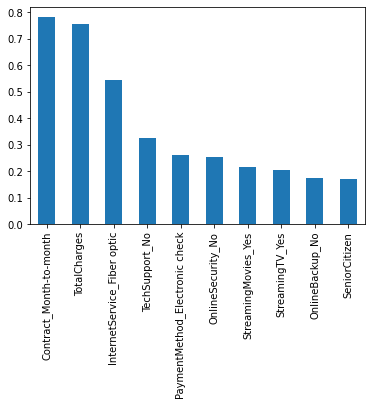

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [ ]:
X.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Trying with Limited Features**





In [ ]:
y = telco_data_final.pop('Churn') # Removing Churn field and storing it in variable y


#Contract_Month-to-month           0.404556
#TechSupport_No                    0.350657
#OnlineSecurity_No                 0.345563
#PaymentMethod_Electronic check    0.311071


In [ ]:
X = telco_data_final[['Contract_Month-to-month', 'TotalCharges','InternetService_Fiber optic','TechSupport_No','PaymentMethod_Electronic check','OnlineSecurity_No']] # Creating a smaller subset of features

#StreamingMovies_Yes


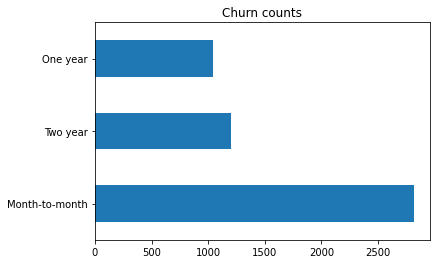

In [ ]:
#validating class imbalance for selected features

telco_data.Contract.value_counts().plot(kind='barh', title='Churn counts')
plt.show()

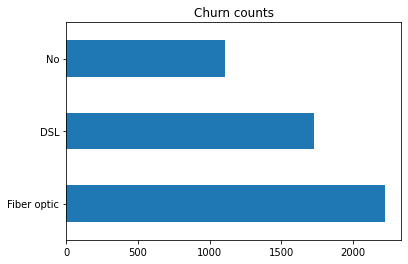

In [ ]:
telco_data.InternetService.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

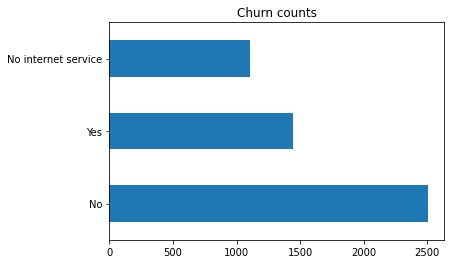

In [ ]:
telco_data.TechSupport.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

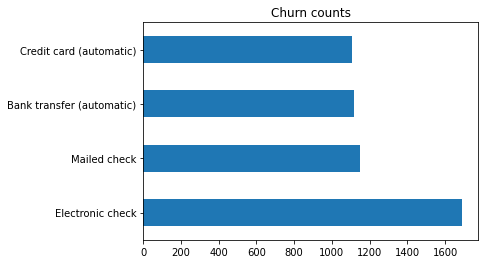

In [ ]:
telco_data.PaymentMethod.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

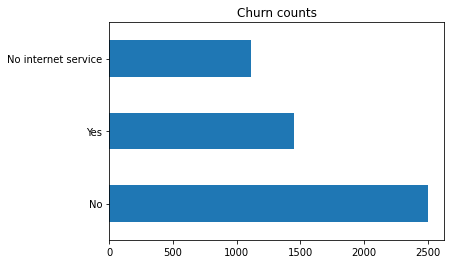

In [ ]:
telco_data.OnlineSecurity.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [ ]:
#y = telco_data_final['Churn'].values
#X = telco_data_final.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.head()

,Contract_Month-to-month,TotalCharges,InternetService_Fiber optic,TechSupport_No,PaymentMethod_Electronic check,OnlineSecurity_No
917,0.0,0.256243,1.0,0.0,0.0,1.0
426,0.0,0.618232,1.0,1.0,0.0,1.0
424,1.0,0.049677,0.0,1.0,0.0,0.0
2791,1.0,0.570136,1.0,1.0,0.0,0.0
4787,0.0,0.115740,0.0,0.0,0.0,0.0


# Fitting model

In [ ]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

# Evaluating model

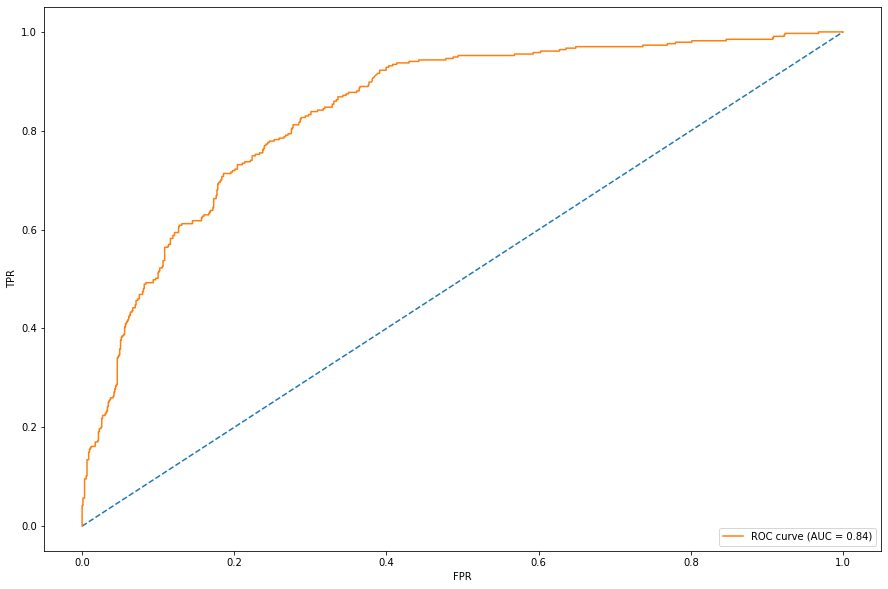

In [ ]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

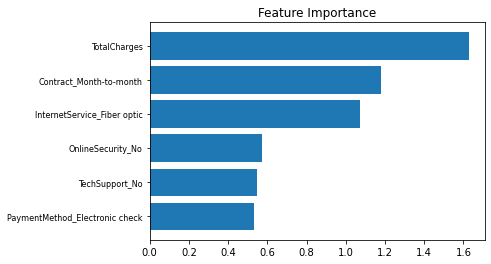

In [ ]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
y_pred=clf.predict(X_test)
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       931
           1       0.65      0.49      0.56       335

    accuracy                           0.80      1266
   macro avg       0.74      0.70      0.72      1266
weighted avg       0.79      0.80      0.79      1266



In [ ]:
#CONFUSION_MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

#[[818  92]
# [173 183]]

[[844  87]
 [170 165]]


**Checking the Model Performance on Unknown test data**

In [ ]:
#Testing model performance on the unknown data

telco_test_data=pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/telco_test_set.csv')

telco_test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4628-WQCQQ,Male,0,No,Yes,35,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,One year,Yes,Electronic check,85.15,3030.6,Yes
1,1746-TGTWV,Male,0,Yes,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),75.35,75.35,No
2,5995-SNNEW,Male,1,Yes,No,23,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.45,2184.85,No
3,8050-WYBND,Female,0,No,Yes,22,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),49.45,1031.4,No
4,2821-WARNZ,Female,0,No,Yes,49,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.45,921.3,No


In [ ]:
# Find missing values
print('Missing values:\n{}'.format(telco_test_data.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(telco_test_data.duplicated().sum()))

# Find the unique values of 'TotalCharges'.
print('\nUnique values of "TotalCharges": {}'.format(telco_test_data['TotalCharges'].unique()))

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Number of duplicated records: 0

Unique values of "TotalCharges": ['3030.6' '75.35' '2184.85' ... '346.45' '306.6' '6844.5']


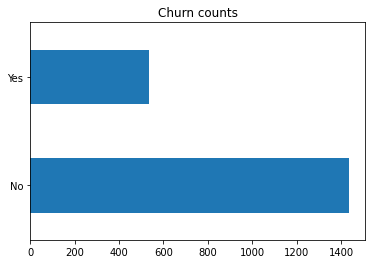

In [ ]:
telco_test_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [ ]:
telco_test_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Converting Total Charges to a numerical data type.
telco_test_data.TotalCharges = pd.to_numeric(telco_test_data.TotalCharges, errors='coerce')
telco_test_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

In [ ]:
#as there are only 3 record that are not null in our dataframe out of 5070 records, we can drop the same
#Removing missing values 
telco_test_data.dropna(inplace = True)

In [ ]:
telco_test_data.shape

(1970, 21)

In [ ]:
#removing customer ID as ID's don't contribute much to analysis

telco_test_data = telco_test_data.iloc[:,1:]

In [ ]:
telco_test_data.Churn = telco_test_data.Churn.replace({'Yes':1, 'No':0}) # Replacing 'Yes' and 'No' with numerical values

In [ ]:
telco_test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,35,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,One year,Yes,Electronic check,85.15,3030.60,1
1,Male,0,Yes,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),75.35,75.35,0
2,Male,1,Yes,No,23,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.45,2184.85,0
3,Female,0,No,Yes,22,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),49.45,1031.40,0
4,Female,0,No,Yes,49,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.45,921.30,0


In [ ]:
categorical_cols = telco_test_data.columns[telco_test_data.dtypes=='object'].tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
# Create dummy variables
telco_test_data_final = pd.get_dummies(data = telco_test_data, columns=categorical_cols, drop_first=False)
telco_test_data_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,35,85.15,3030.60,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
1,0,1,75.35,75.35,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,1,23,104.45,2184.85,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,0,22,49.45,1031.40,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
4,0,49,19.45,921.30,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,0,24,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1969,0,72,103.20,7362.90,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
1970,0,11,29.60,346.45,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1971,1,4,74.40,306.60,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
# We will use the data frame where we had created dummy variables
y = telco_test_data_final['Churn'].values
X = telco_test_data_final[['Contract_Month-to-month', 'TotalCharges','InternetService_Fiber optic','TechSupport_No','PaymentMethod_Electronic check','OnlineSecurity_No']] # Creating a smaller subset of features

#X = telco_test_data_final.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:

predictions = clf.predict_proba(X)[:, 1]

In [ ]:
predictions

array([0.31384541, 0.60457081, 0.63610651, ..., 0.322934  , 0.59413577,
       0.04131752])

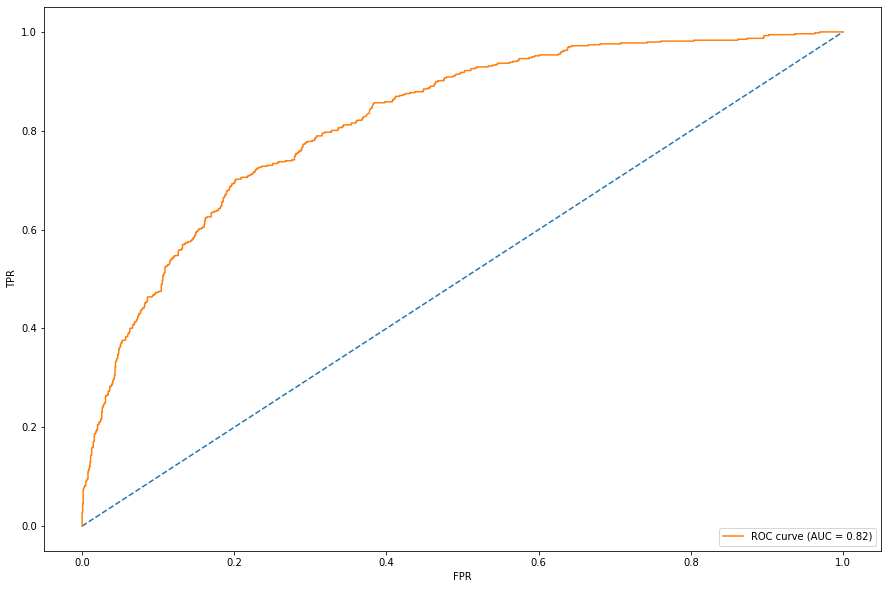

In [ ]:
# calculate scores
auc = roc_auc_score(y, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

In [ ]:
#classification report on test data

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
y_pred=clf.predict(X)
print("Classification Report")
print(classification_report(y, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1433
           1       0.65      0.47      0.55       537

    accuracy                           0.79      1970
   macro avg       0.73      0.69      0.70      1970
weighted avg       0.77      0.79      0.77      1970



In [ ]:
#CONFUSION_MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y, y_pred)
print(cm)

#[[1292  141]
# [ 285  252]]

[[1294  139]
 [ 283  254]]


In [ ]:
Summary:
=======

AUC on test data: 0.82
Precision on test data: 0.82
Recall on test data: 0.90
f1-score on test data: 0.86


confusion matrix on test data(100% of test data)
==========================================================

[[1292  141]
 [ 285  252]]


confusion matrix on tarinning data(70% of original trainning data)
==========================================================

[[818  92]
 [173 183]]

Checking decision Tree classfier model on this data set

In [ ]:
#checking decision tree classifier mode

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=6)

print(dt_model)

dt_model = dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict_proba(X_test)[:, 1]
pred_dt

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               class_names=['Not churn', 'Churn'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
y_pred_dt=dt_model.predict(X_test)
print("Classification Report")
print(classification_report(y_test, y_pred_dt))

In [ ]:
#CONFUSION_MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
